# Questão 1 - Solução da equação de Laplace

###Código para se resolver Ax=b, onde x é o vetor de potenciais.

In [ ]:
#Bibliotecas utilizadas:
import numpy as np

#Inicializando matrizes com todos os valores nulos:
mpontos = np.zeros([9,9], dtype=float)  #Matriz de pontos.
A = np.zeros([21,21], dtype=int)      #Matriz de coeficientes. Cada linha será resultado da equação obtida em cada ponto e cada coluna corresponderá a uma variável (ponto).
b = np.zeros([21], dtype=int)         #Matriz de termos independentes.

#Enumerando os pontos na matriz de pontos:
contador = 1
#Iterações para percorrer toda a matriz de pontos.
for i in range (0,9):
  for j in range (0,9):
    if(i != 8 and j != 0):            #Estrutura condicional para não enumerar os pontos com valores de contorno.
      if(i>j):                        #Estrutura condicional para preencher apenas os valores abaixo da diagonal principal.
        mpontos[i,j] = contador
        contador = contador + 1

#Montagem do sistema linear, preenchendo a matriz 'A' de coeficientes e o vetor 'b' de termos independentes:
#Iterações para percorrer toda a matriz de pontos.
for i in range (0,9):
  for j in range (0,9):
    if(mpontos[i,j]!=0):              #Aplicando o gabarito: -4*u[i,j] + u[i,j+1] + u[i,j-1] + u[i+1,j] + u[i-1,j] = 0, apenas aos pontos enumerados da matriz de pontos 'mpontos'.
      aux = int(mpontos[i,j])         #A variável 'aux' armazena o número do ponto. Cada ponto representa uma variável na matriz A[21x21], ou seja, cada ponto terá sua coluna na matriz de coeficientes.
      A[aux-1, aux-1] = -4            #O valor armazenado em 'aux' será o centro do gabarito e, por isso, será o elemento multiplicado por '-4'. A posição na matriz 'A' é dada por aux-1, pois em Python os índices começam em 0.

      #Verificação do elemento à direita do ponto central:
      #Nesta situação, o elemento à direita só poderá ser outro ponto ou o valor de contorno da diagonal principal, '100'.
      if(i==j+1):                     #Se o valor à direita pertencer a diagonal principal, o valor de contorno (termo independente) é colocado no vetor 'b' em sua respectiva linha.
        b[aux-1]=b[aux-1]-100
      else:                           #Se o valor for um outro ponto, adiciona-se 1 à coluna correspondente da matriz de coeficientes.
        var = int(mpontos[i,j+1])     #A variável 'var' armazena o valor do ponto à direita.
        A[aux-1, var-1] = 1

      #Verificação do elemento à esquerda do ponto central:
      #Nesta situação, o elemento à esquerda só poderá ser outro ponto ou o valor de contorno '0'.
      if(j-1!=0):
        var = int(mpontos[i,j-1])
        A[aux-1, var-1] = 1

      #Verificação do elemento acima do ponto central:
      #Similar ao explicado no elemento à direita.
      if(j==i-1):
        b[aux-1]=b[aux-1]-100
      else:
        var = int(mpontos[i-1,j])
        A[aux-1, var-1] = 1
      
      #Verificação do elemento abaixo do ponto central:
      #Similar ao explicado no elemento à esquerda.
      if(i+1!=8):                 
        var = int(mpontos[i+1,j])
        A[aux-1, var-1] = 1

#Resolvendo o sistema de equações lineares a partir da fórmula Ax = b
x = np.linalg.solve(A,b)

###Código para passar os valores de x para a matriz de pontos.

In [ ]:
for i in range(0,9):
  for j in range(0,9):

      if(i==j):
        mpontos[i,j]=100                    #Valor de contorno.
      elif(i==8 or j==0):
        mpontos[i,j]=0                      #Valor de contorno.
      elif(i>j):
        ponto = int(mpontos[i,j])           #Pegando o número do ponto.
        mpontos[i,j] = x[ponto-1]           #Passando o valor do ponto armazenado em x para a matriz de pontos.

###Código para printar os valores obtidos em um formato livre.

In [ ]:
for i in range(1,8):
  print(" ")
  for j in range(1,9):
    if(i>=j):
      print(str(round(mpontos[i,j],2)), end=" ")

 
100.0  
60.25 100.0  
41.02 74.26 100.0  
29.55 56.02 79.04 100.0  
21.18 41.23 60.13 79.04 100.0  
13.93 27.58 41.23 56.02 74.26 100.0  
6.97 13.93 21.18 29.55 41.02 60.25 100.0 

###Código para mostrar os dados em uma tabela.

In [ ]:
import pandas as pd

df = pd.DataFrame(mpontos)    #Passando os valores da matriz de pontos para uma tabela.
df

,0,1,2,3,4,5,6,7,8
0,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,60.254164,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,41.016656,74.259012,100.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,29.553450,56.019391,79.037986,100.000000,0.000000,0.000000,0.0,0.0
5,0.0,21.177751,41.227118,60.132552,79.037986,100.000000,0.000000,0.0,0.0
6,0.0,13.930437,27.578777,41.227118,56.019391,74.259012,100.000000,0.0,0.0
7,0.0,6.965218,13.930437,21.177751,29.553450,41.016656,60.254164,100.0,0.0
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,100.0


# Questão 2 - Solução pelo método iterativo

###Código para calcular os potenciais de forma iterativa.

In [ ]:
#Bibliotecas utilizadas:
import numpy as np

chute = float(input("Digite o chute inicial: "))            #Variável que armazena o valor do chute inicial para os pontos internos.
precisao = float(input("Digite o valor da precisão: "))     #Variável que armazena a precisão.
rep = int(input("Digite o número máximo de iterações: "))   #Variável que armazena o número de repetições máximas.

mpontos = np.zeros([9,9])                                   #Criando a grade.

#Percorrendo a grade:
for i in range (0,9):
  for j in range (0,9):
    if(i != 8 and j != 0):      #Estrutura condicional para evitar as condições de contorno.
      if(i>j):
        mpontos[i,j] = chute    #Preenchendo os pontos internos com o chute inicial.
      elif(i==j):
        mpontos[i,j] = 100      #Preenchendo a diagonal principal com o valor de contorno, '100'.

stop = False                    #Variável de controle para parar o while.

#O while só deverá parar se o número de repetições acabar ou o erro relativo for menor ou igual a precisão estabelecida.
while((stop==False) and (rep!=0)):
  contador=0                                                                             #Contador que armazena quantos pontos já estão com um erro relativo menor que a precisão.

  #Percorrendo a grade.
  for i in range (0,9):
    for j in range (0,9):
      if(i>j and i!=8 and j!=0):                                                         #Percorrendo apenas os pontos abaixo da diagonal principal e diferentes da extremidade.
        aux = mpontos[i,j]                                                               #Variável 'aux' armazena o valor que será substituído, visando utilizá-lo no cálculo do erro.
        calculo = (mpontos[i,j+1]+mpontos[i,j-1]+mpontos[i+1,j]+mpontos[i-1,j])/4        #Cálculo do valor do elemento central do gabarito: u[i,j] = (u[i,j+1] +u [i,j-1] + u[i+1,j] + u[i-1,j])/4
        mpontos[i,j]=calculo                                                             #Substituição pelo novo valor calculado.

        erro = abs((calculo-aux)/calculo)                                                #Calculando o erro relativo e = |Valor_atual - Valor_anterior|/Valor_atual
        if(erro<=precisao):
          contador = contador + 1                                                        #Se o valor do erro for menor que a precisão estabelecida, o 'contador' é acrescido em 1.
          if(contador == 21):                                                            #Nesta situação, como são 21 pontos internos, caso o 'contador' chegue a 21, a variável de controle, 'stop', é ativada.
            stop = True
      
  rep = rep-1                                                                            #O número de repetições é decrementado.
  

Digite o chute inicial: 0
Digite o valor da precisão: 0.0001
Digite o número máximo de iterações: 100


###Código para organizar os dados em uma tabela.

In [ ]:
import pandas as pd

df = pd.DataFrame(mpontos)
df

,0,1,2,3,4,5,6,7,8
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,60.253526,100.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,41.014959,74.257479,100.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,29.550893,56.016442,79.036285,100.000000,0.000000,0.000000,0.0,0.0
5,0.0,21.175026,41.223693,60.129989,79.036855,100.000000,0.000000,0.0,0.0
6,0.0,13.928314,27.576003,41.224840,56.018087,74.258561,100.000000,0.0,0.0
7,0.0,6.964157,13.929025,21.176546,29.552698,41.016324,60.254081,100.0,0.0
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


###Código para plotar o gráfico heatmap.

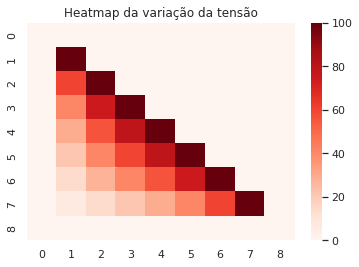

In [ ]:
#Importando as bibliotecas:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set();                                      #Inicializando a biblioteca.

x = sns.heatmap(df, cmap='Reds');               #Construção do gráfico.
plt.title('Heatmap da variação da tensão')      #Título do gráfico.
plt.savefig("Heatmap2.png")                     #Salvando o gráfico gerado.
plt.show()                                      #Exibindo o gráfico.

# Questão 3 - Análise comparativa entre os dois métodos

###Medindo o tempo de execução do primeiro método.

In [ ]:
import numpy as np
import time

tempo_inicial = time.time() #Iniciando o cronômetro.

mpontos = np.zeros([9,9], dtype=int)
A = np.zeros([21,21], dtype=int)
b = np.zeros([21], dtype=int)

contador = 1

for i in range (0,9):
  for j in range (0,9):
    if(i != 8 and j != 0):
      if(i>j):
        mpontos[i,j]=contador
        contador=contador+1

for i in range (0,9):
  for j in range (0,9):
    if(mpontos[i,j]!=0):
      aux = int(mpontos[i,j])
      A[aux-1, aux-1] = -4
      if(i==j+1):
        b[aux-1]=b[aux-1]-100
      else:
        var = int(mpontos[i,j+1])
        A[aux-1, var-1] = 1

      if(j-1!=0):
        var = int(mpontos[i,j-1])
        A[aux-1, var-1] = 1

      if(j==i-1):
        b[aux-1]=b[aux-1]-100
      else:
        var = int(mpontos[i-1,j])
        A[aux-1, var-1] = 1
      
      if(i+1!=8):
        var = int(mpontos[i+1,j])
        A[aux-1, var-1] = 1

x = np.linalg.solve(A,b)

tempo_final = time.time()  #Parando o cronômetro.

tempo = tempo_final - tempo_inicial
tempo #Printando o tempo de execução.

0.0016505718231201172

###Medindo o tempo de execução do segundo método.

In [ ]:
import numpy as np
import time

chute = float(input("Digite o chute inicial: "))
precisao = float(input("Digite o valor da precisão: "))
rep = int(input("Digite o número máximo de iterações: "))

tempo_inicial = time.time() #Iniciando o cronômetro.

mpontos = np.zeros([9,9])

for i in range (0,9):
  for j in range (0,9):
    if(i != 8 and j != 0):
      if(i>j):
        mpontos[i,j] = chute
      elif(i==j):
        mpontos[i,j] = 100

stop = False
while((stop==False) and (rep!=0)):
  contador=0
  for i in range (0,9):
    for j in range (0,9):
      if(i>j and i!=8 and j!=0):
        aux = mpontos[i,j]
        calculo = (mpontos[i,j+1]+mpontos[i,j-1]+mpontos[i+1,j]+mpontos[i-1,j])/4
        mpontos[i,j]=calculo

        erro = (calculo-aux)/calculo
        if(erro<=precisao):
          contador = contador + 1
          if(contador == 21):
            stop = True
      
  rep = rep-1

tempo_final = time.time()  #Parando o cronômetro.

tempo = tempo_final - tempo_inicial
tempo #Printando o tempo de execução.

Digite o chute inicial: 0
Digite o valor da precisão: 0.0001
Digite o número máximo de iterações: 25


0.002186298370361328

###Códigos para gerar o heatmap com um número maior de pontos.
Para isso utiliza-se o método iterativo, porém desconsiderando a precisão.

In [1]:
import numpy as np

chute = float(input("Digite o chute inicial: "))      
precisao = float(input("Digite o valor da precisão: "))     
rep = int(input("Digite o número máximo de iterações: "))  


###CUIDADO###
#Em caso de lentidão, reduza o valor de n:
n = 100
mpontos = np.zeros([n,n])                                  

for i in range (0,n):
  for j in range (0,n):
    if(i != n-1 and j != 0):      
      if(i>j):
        mpontos[i,j] = chute    
      elif(i==j):
        mpontos[i,j] = 100      

stop = False                    


while((stop==False) and (rep!=0)):
  contador=0                                                                             

  for i in range (0,n):
    for j in range (0,n):
      if(i>j and i!=n-1 and j!=0):                                                        
        aux = mpontos[i,j]                                                               
        calculo = (mpontos[i,j+1]+mpontos[i,j-1]+mpontos[i+1,j]+mpontos[i-1,j])/4        
        mpontos[i,j]=calculo                                                             
      
  rep = rep-1                                                                            
  

Digite o chute inicial: 0
Digite o valor da precisão: 0.0001
Digite o número máximo de iterações: 100


In [2]:
import pandas as pd

df = pd.DataFrame(mpontos)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,6.046548e+01,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,4.186224e+01,7.532361e+01,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,3.166106e+01,5.943341e+01,8.208412e+01,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,2.355477e-09,5.544570e-09,1.013532e-08,1.697382e-08,2.733106e-08,4.312054e-08,6.721961e-08,1.039423e-07,1.597321e-07,...,52.462675,58.556760,65.868680,74.809361,85.939308,100.000000,0.000000,0.000000,0.0,0.0
96,0.0,1.459613e-09,3.443917e-09,6.312452e-09,1.060308e-08,1.712714e-08,2.711090e-08,4.240542e-08,6.579651e-08,1.014605e-07,...,40.333059,45.303697,51.394073,59.052048,68.949749,82.100610,100.000000,0.000000,0.0,0.0
97,0.0,8.569362e-10,2.025556e-09,3.720329e-09,6.263143e-09,1.014101e-08,1.609215e-08,2.523405e-08,3.925309e-08,6.068424e-08,...,27.406064,30.944210,35.360338,41.059845,48.709342,59.453453,75.330284,100.000000,0.0,0.0
98,0.0,4.101271e-10,9.702042e-10,1.783599e-09,3.005666e-09,4.871760e-09,7.739072e-09,1.214893e-08,1.891920e-08,2.928062e-08,...,13.870130,15.715130,18.048691,21.120904,25.376015,31.674288,41.867873,60.466968,100.0,0.0


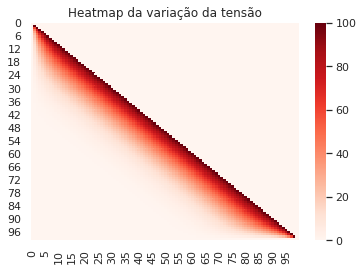

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set();

x = sns.heatmap(df, cmap='Reds');
plt.title('Heatmap da variação da tensão')
plt.savefig("Heatmap1.png")
plt.show()

###Códigos para se analisar o tempo de execução.

In [ ]:
import time

In [ ]:
import numpy as np

n = 9
qtdl = []
tempol = []

###CUIDADO###
#Em caso de lentidão, reduza o valor da condição do while abaixo e aumente a soma de 'n' na linha 59
while(n!=99):

  timei = time.time()  

  pontos = int(((n**2) - 5*n + 6)/2)
  mpontos = np.zeros([n, n], dtype=float)  
  A = np.zeros([pontos, pontos], dtype=int)      
  b = np.zeros([pontos], dtype=int)         

  contador = 1

  for i in range (0,n):
    for j in range (0,n):
      if(i != n-1 and j != 0):            
        if(i>j):                        
          mpontos[i,j] = contador
          contador = contador + 1

  for i in range (0,n):
    for j in range (0,n):
      if(mpontos[i,j]!=0):              
        aux = int(mpontos[i,j])         
        A[aux-1, aux-1] = -4           
        if(i==j+1):                    
          b[aux-1]=b[aux-1]-100
        else:                           
          var = int(mpontos[i,j+1])     
          A[aux-1, var-1] = 1

        if(j-1!=0):
          var = int(mpontos[i,j-1])
          A[aux-1, var-1] = 1

        if(j==i-1):
          b[aux-1]=b[aux-1]-100
        else:
          var = int(mpontos[i-1,j])
          A[aux-1, var-1] = 1
        
        if(i+1!=n-1):                 
          var = int(mpontos[i+1,j])
          A[aux-1, var-1] = 1

  x = np.linalg.solve(A,b)

  timef = time.time()
  timex = timef - timei

  tempol.append(timex)
  qtdl.append(n)
  n += 9 #Aumente esse valor em caso de lentidão

print(tempol)

[0.0005102157592773438, 0.0017392635345458984, 0.006430864334106445, 0.018268108367919922, 0.048894643783569336, 0.11419510841369629, 0.2095353603363037, 0.5237464904785156, 0.8937840461730957, 1.6037206649780273]


In [ ]:
import numpy as np

chute = 0    
precisao = 0.0001     
rep = 25

n = 9
qtdr = []
tempor = []

###CUIDADO###
#Em caso de lentidão, reduza o valor da condição do while abaixo e aumente a soma de 'n' na linha 59
while(n!=99):

  timei = time.time() 

  mpontos = np.zeros([n,n])                                  

  for i in range (0,n):
    for j in range (0,n):
      if(i != n-1 and j != 0):      
        if(i>j):
          mpontos[i,j] = chute    
        elif(i==j):
          mpontos[i,j] = 100      

  stop = False                    

  while((stop==False) and (rep!=0)):
    contador=0                                                                             

    for i in range (0,n):
      for j in range (0,n):
        if(i>j and i!=(n-1) and j!=0):                                                        
          aux = mpontos[i,j]                                                             
          calculo = (mpontos[i,j+1]+mpontos[i,j-1]+mpontos[i+1,j]+mpontos[i-1,j])/4        
          mpontos[i,j]=calculo                                                             
        
          erro = (calculo-aux)/calculo
          if(erro<=precisao):
            contador = contador + 1
            if(contador == ((n**2)-5*n+6)/2):
              stop = True

    rep = rep-1
  
  timef = time.time()
  timex = timef - timei

  tempor.append(timex)
  qtdr.append(n)
  n += 9 #Aumente esse valor em caso de lentidão

print(tempor)

[0.0016937255859375, 0.00011301040649414062, 0.00023984909057617188, 0.0004277229309082031, 0.0006699562072753906, 0.0009615421295166016, 0.0013108253479003906, 0.0016829967498779297, 0.002135753631591797, 0.0026772022247314453]


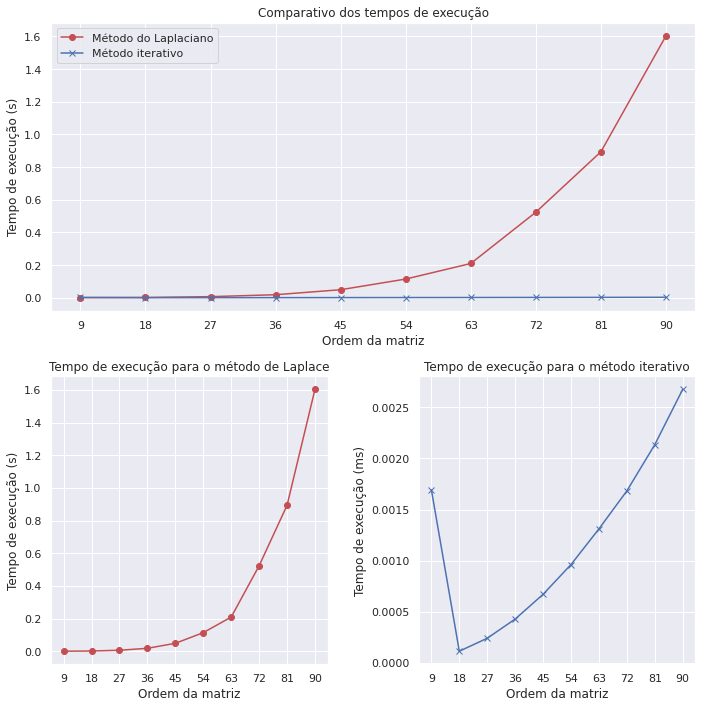

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
line1, = plt.plot(qtdl, tempol, marker='o', color='r', label="Método do Laplaciano")
line2, = plt.plot(qtdl, tempor, marker='x', color='b', label="Método iterativo")
plt.xlabel("Ordem da matriz")
plt.ylabel("Tempo de execução (s)")
plt.legend(handles=[line1, line2])
plt.title("Comparativo dos tempos de execução")
plt.xticks(qtdl)

plt.subplot(2, 2, 3)
plt.plot(qtdl, tempol, marker='o', color='r')
plt.xlabel("Ordem da matriz")
plt.ylabel("Tempo de execução (s)")
plt.title("Tempo de execução para o método de Laplace")
plt.xticks(qtdl)

plt.subplot(2, 2, 4)
line2, = plt.plot(qtdl, tempor, marker='x', color='b', label="Método iterativo")
plt.xlabel("Ordem da matriz")
plt.ylabel("Tempo de execução (ms)")
plt.title("Tempo de execução para o método iterativo")
plt.xticks(qtdl)

fig.tight_layout()
plt.savefig("tempo_codigo.png")
plt.show()